<a href="https://colab.research.google.com/github/mohsenperfection/ML/blob/main/Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: **Mohsen Kamalabadi Farahani**

**Student ID**: **99102083**



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [ ]:
## Import necessary libraries here ##
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split


**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

In [ ]:
## Write your code here ##

data = pd.read_csv('Q1/boston.csv')

# First few rows of the data
print(data.head())

# Summarize the data
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Check the shape of the data
print(data.shape)


      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
             CRIM          ZN       INDUS        CHAS          NX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    

**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [ ]:
## Write your code here ##

# The features and the target
X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R^2 and RMSE for the training set
r2_train = r2_score(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)

# Calculate R^2 and RMSE for the testing set
r2_test = r2_score(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

# Output
print("Training R^2: {:.2f}, RMSE: {:.2f}".format(r2_train, rmse_train))
print("Testing R^2: {:.2f}, RMSE: {:.2f}".format(r2_test, rmse_test))

# The coefficients
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Training R^2: 0.75, RMSE: 4.65
Testing R^2: 0.67, RMSE: 4.93
Coefficients: [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
Intercept: 30.24675099392425


/Users/mohsenfarahani/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/mohsenfarahani/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10*np.linspace (3,-3,100) *0.5$$

In [ ]:
## Write your code here ##

alphas = np.logspace(3, -3, 100) * 0.5

# RidgeCV regressor with corrected alphas
ridge_model = RidgeCV(alphas=alphas, store_cv_values=True)

# Fit model
ridge_model.fit(X_train, y_train)

# Best alpha
best_alpha = ridge_model.alpha_
print("Best alpha:", best_alpha)

# Evaluate the model
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

# R^2 and RMSE for the training set
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
rmse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge, squared=False)

# R^2 and RMSE for the testing set
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
rmse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge, squared=False)

# Output
print("Ridge Regression - Training R^2: {:.2f}, RMSE: {:.2f}".format(r2_train_ridge, rmse_train_ridge))
print("Ridge Regression - Testing R^2: {:.2f}, RMSE: {:.2f}".format(r2_test_ridge, rmse_test_ridge))

# The coefficients
print("Coefficients:", ridge_model.coef_)



Best alpha: 0.02488511782166057
Ridge Regression - Training R^2: 0.75, RMSE: 4.65
Ridge Regression - Testing R^2: 0.67, RMSE: 4.93
Coefficients: [-1.12882556e-01  3.02021621e-02  3.89352060e-02  2.77558167e+00
 -1.68657905e+01  4.44072430e+00 -6.56266909e-03 -1.44305254e+00
  2.61797839e-01 -1.06818373e-02 -9.11581650e-01  1.23642949e-02
 -5.09180926e-01]


/Users/mohsenfarahani/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/mohsenfarahani/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

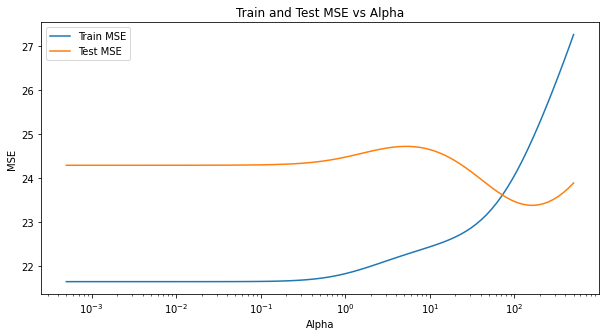

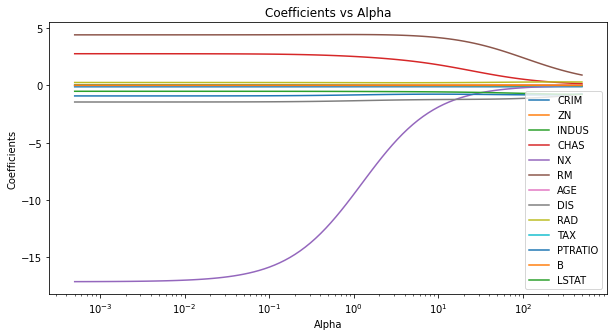

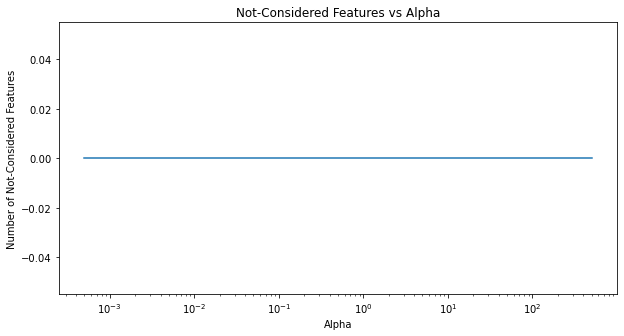

Optimal alpha from RidgeCV:  0.02488511782166057


In [ ]:
## Write your code here ##

# Results
train_mse = []
test_mse = []

# MSE for each alpha
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    train_mse.append(mean_squared_error(y_train, ridge.predict(X_train)))
    test_mse.append(mean_squared_error(y_test, ridge.predict(X_test)))

# MSE
plt.figure(figsize=(10, 5))
plt.plot(alphas, train_mse, label='Train MSE')
plt.plot(alphas, test_mse, label='Test MSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Train and Test MSE vs Alpha')
plt.legend()
plt.show()

# Coefficients
coefficients = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    coefficients.append(ridge.coef_)

plt.figure(figsize=(10, 5))
for i in range(len(X.columns)):
    plt.plot(alphas, [coef[i] for coef in coefficients], label=X.columns[i])

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Coefficients vs Alpha')
plt.legend()
plt.show()
# Number of not-considered features
not_considered = []

for coef in coefficients:
    not_considered.append(sum(c == 0 for c in coef))

plt.figure(figsize=(10, 5))
plt.plot(alphas, not_considered)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Not-Considered Features vs Alpha')
plt.show()

print("Optimal alpha from RidgeCV: ", best_alpha)

**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

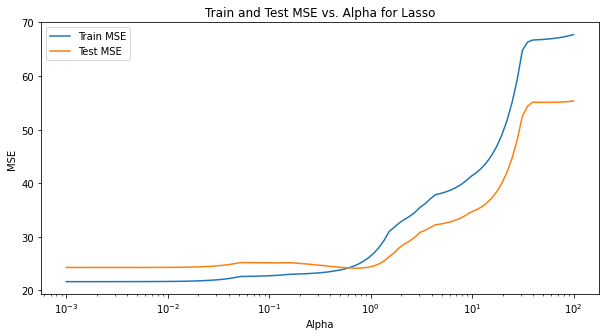

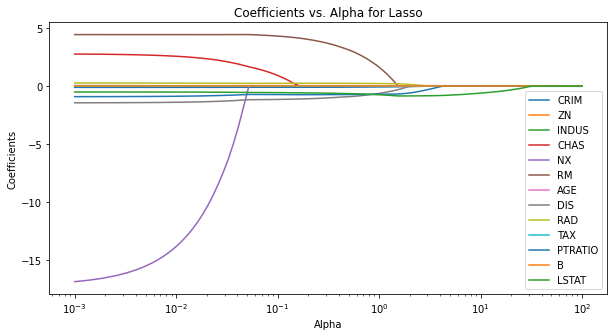

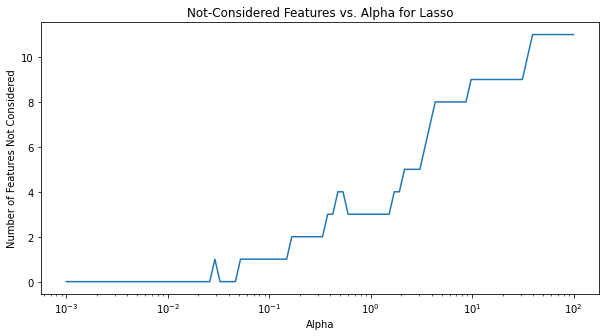

Optimal alpha from LassoCV:  0.001
Lasso Regression - R^2: 0.67
Lasso Regression - MSE: 24.29
Coefficients: [-1.12881360e-01  3.01954998e-02  3.89490293e-02  2.76307020e+00
 -1.68662604e+01  4.43878387e+00 -6.51620597e-03 -1.44268060e+00
  2.61824758e-01 -1.06817501e-02 -9.11693590e-01  1.23646200e-02
 -5.09377240e-01]


In [ ]:
## Write your code here ##

alphas = np.logspace(-3, 2, 100)
train_mse = []
test_mse = []
coefficients = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    train_mse.append(mean_squared_error(y_train, lasso.predict(X_train)))
    test_mse.append(mean_squared_error(y_test, lasso.predict(X_test)))
    coefficients.append(lasso.coef_)
plt.figure(figsize=(10, 5))
plt.plot(alphas, train_mse, label='Train MSE')
plt.plot(alphas, test_mse, label='Test MSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Train and Test MSE vs. Alpha for Lasso')
plt.legend()
plt.show()
plt.figure(figsize=(10, 5))
for i in range(len(X.columns)):
    plt.plot(alphas, [coef[i] for coef in coefficients], label=X.columns[i])

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Coefficients vs. Alpha for Lasso')
plt.legend()
plt.show()
not_considered = [np.sum(np.isclose(coef, 0)) for coef in coefficients]

plt.figure(figsize=(10, 5))
plt.plot(alphas, not_considered)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Number of Features Not Considered')
plt.title('Not-Considered Features vs. Alpha for Lasso')
plt.show()
lasso_cv = LassoCV(alphas=alphas, cv=10, max_iter=10000)
lasso_cv.fit(X_train, y_train)

print("Optimal alpha from LassoCV: ", lasso_cv.alpha_)
print("Lasso Regression - R^2: {:.2f}".format(r2_score(y_test, lasso_cv.predict(X_test))))
print("Lasso Regression - MSE: {:.2f}".format(mean_squared_error(y_test, lasso_cv.predict(X_test))))
print("Coefficients:", lasso_cv.coef_)



**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

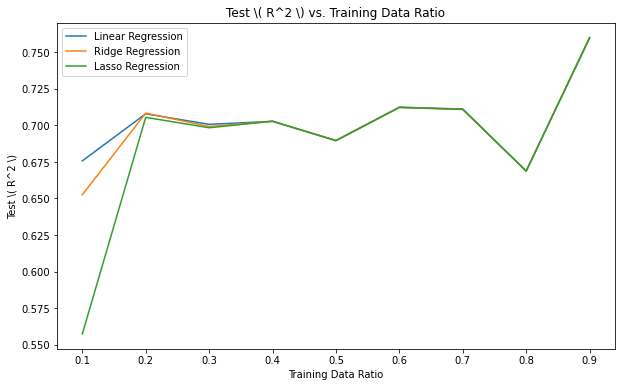

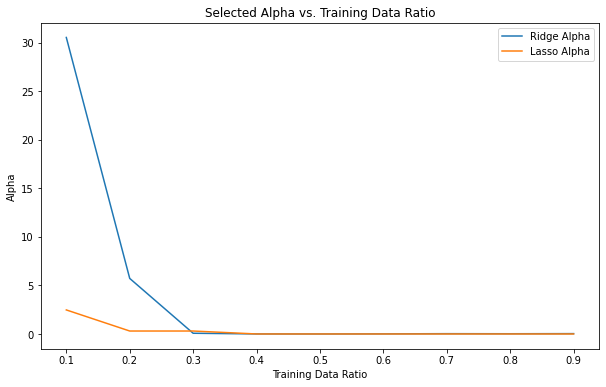

In [ ]:
## Write you code here ##

# Training data ratios
training_ratios = np.linspace(0.1, 0.9, 9)

# Results
results = {
    'Ratio': [],
    'Linear R^2': [],
    'Ridge R^2': [],
    'Lasso R^2': [],
    'Ridge Alpha': [],
    'Lasso Alpha': []
}

# Loop over each ratio
for ratio in training_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio, random_state=42)

    # Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    lr_r2 = r2_score(y_test, lr.predict(X_test))

    # Ridge Regression
    ridge = RidgeCV(alphas=np.logspace(-3, 3, 100))
    ridge.fit(X_train, y_train)
    ridge_r2 = r2_score(y_test, ridge.predict(X_test))

    # Lasso Regression
    lasso = LassoCV(alphas=np.logspace(-3, 3, 100), max_iter=10000)
    lasso.fit(X_train, y_train)
    lasso_r2 = r2_score(y_test, lasso.predict(X_test))

    # Store results
    results['Ratio'].append(ratio)
    results['Linear R^2'].append(lr_r2)
    results['Ridge R^2'].append(ridge_r2)
    results['Lasso R^2'].append(lasso_r2)
    results['Ridge Alpha'].append(ridge.alpha_)
    results['Lasso Alpha'].append(lasso.alpha_)

# Plotting
results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 6))
plt.plot(results_df['Ratio'], results_df['Linear R^2'], label='Linear Regression')
plt.plot(results_df['Ratio'], results_df['Ridge R^2'], label='Ridge Regression')
plt.plot(results_df['Ratio'], results_df['Lasso R^2'], label='Lasso Regression')
plt.xlabel('Training Data Ratio')
plt.ylabel('Test \( R^2 \)')
plt.title('Test \( R^2 \) vs. Training Data Ratio')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(results_df['Ratio'], results_df['Ridge Alpha'], label='Ridge Alpha')
plt.plot(results_df['Ratio'], results_df['Lasso Alpha'], label='Lasso Alpha')
plt.xlabel('Training Data Ratio')
plt.ylabel('Alpha')
plt.title('Selected Alpha vs. Training Data Ratio')
plt.legend()
plt.show()
